<a href="https://colab.research.google.com/github/CarlosRochaCx/MNA/blob/main/Actividad5Preprocesamiento_A01796914.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 5**
Preprocesamiento de datos

---

*   NOMBRE: Carlos Alberto Rocha Chávez
*   MATRÍCULA: A01796914

In [256]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [257]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA - Maestría en Inteligencia Artificial Aplicada/Ciencia y Analítica de Datos/Actividad 5 - Preprocesamiento"
os.chdir(DIR)

In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [259]:
response_df = pd.read_csv('responses.csv')
response_df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats


1. Determina cuántas variables numéricas y cuántas de texto posee el conjunto de datos con el método `info()` y utiliza el método `describe()` del dataframe, para obtener el resumen de las estadísticas descriptivas. Separa el análisis según el tipo de datos (number, object).

In [260]:
response_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB


Al usar la función `info()` podemos ver que nuestra base de datos cuenta con 139 variables numéricas y 11 variables de texto.

In [261]:
response_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Music,1007.0,4.731877,0.664049,1.0,5.0,5.0,5.0,5.0
Slow songs or fast songs,1008.0,3.328373,0.833931,1.0,3.0,3.0,4.0,5.0
Dance,1006.0,3.113320,1.170568,1.0,2.0,3.0,4.0,5.0
Folk,1005.0,2.288557,1.138916,1.0,1.0,2.0,3.0,5.0
Country,1005.0,2.123383,1.076136,1.0,1.0,2.0,3.0,5.0
...,...,...,...,...,...,...,...,...
Spending on healthy eating,1008.0,3.557540,1.093750,1.0,3.0,4.0,4.0,5.0
Age,1003.0,20.433699,2.828840,15.0,19.0,20.0,22.0,30.0
Height,990.0,173.514141,10.024505,62.0,167.0,173.0,180.0,203.0
Weight,990.0,66.405051,13.839561,41.0,55.0,64.0,75.0,165.0


In [262]:
response_df.describe(include='object').T

,count,unique,top,freq
Smoking,1002,4,tried smoking,430
Alcohol,1005,3,social drinker,659
Punctuality,1008,3,i am always on time,399
Lying,1008,4,sometimes,549
Internet usage,1010,4,few hours a day,744
Gender,1004,2,female,593
Left - right handed,1007,2,right handed,906
Education,1009,6,secondary school,621
Only child,1008,2,no,754
Village - town,1006,2,city,707


2. Clasifique la variable `Weight` según su escala de medición. En función de ello elija el gráfico a generar (histograma / barras) y fundamente su elección.


In [263]:
response_df['Weight'].value_counts()

,count
Weight,
60.0,76
55.0,62
70.0,51
80.0,50
65.0,49
...,...
111.0,1
41.0,1
103.0,1


<Axes: >

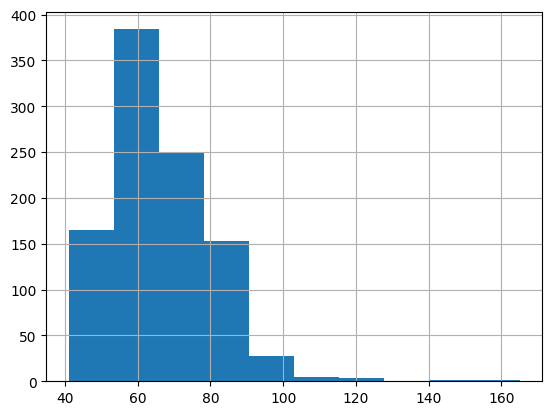

In [264]:
response_df['Weight'].hist()

En este histograma se puede observar la distribución de los valores de la variable `Weight`. El uso del histograma, en lugar de una gráfica de barras, se debe a que la variable `Weight` posee datos cuantitativos continuos, los cuales son mejor representados con este gráfico.

3. Clasifique la distribución del peso según su asimetría, justificando tu respuesta. Incluye el cálculo numérico que lo demuestra.

In [265]:
response_df['Weight'].skew()

1.2237251927527477

Al observar el histograma, y validarlo con la función `skew()`, podemos confirmar que la variable `Weight` es asimétrica positiva al devolver un valor mayor a 1. Esto se puede confirmar visualmente en el histograma, al ver como la "cola" de los datos tiene la tendencia a la derecha.

4. ¿Cuántos valores faltantes tiene la variable `Weight`? ¿Qué porcentaje representa?


In [266]:
response_df['Weight'].isna().sum()

20

In [267]:
response_df['Weight'].isna().sum()/len(response_df['Weight'])*100

1.9801980198019802

Con los cálculos previamente realizados, podemos ver que la variable `Weight` tiene 20 valores faltantes, lo cuál representa el 1.98% de todos nuestros datos.

5. ¿Tendrán los valores faltantes de `Weight` relación con alguna otra variable? Analízalo considerando las siguientes columnas:
*   Numéricas: `Age, Number of siblings`
*   Categóricas: `Gender, Education`

Para ello deberás dividir cada columna en dos grupos: con/sin faltantes en `Weight` y utilizar métodos gráficos y la prueba t para ver si hay diferencias significativas. NO olvides incluir las conclusiones del análisis con los resultados obtenidos.

**NOTA**. Puedes reutilizar las funciones `Diagnose_MV_Numerical` y `Diagnose_MV_Categorical` definidas en Hands-On-Prep_Missing_Values.zip. Revisa nuevamente cómo utilizarlas.

In [268]:
from scipy.stats import ttest_ind
def Diagnose_MV_Numerical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    labels=[]
    box_sr = pd.Series('',index = BM_MV.unique())
    for poss in BM_MV.unique():
        BM = BM_MV == poss
        box_sr[poss] = df[BM][str_att_name].dropna()
        labels.append(MV_labels[poss])

    plt.boxplot(box_sr,vert=False)
    plt.yticks([1,2],labels)
    plt.xlabel(str_att_name)
    plt.show()

    plt.figure(figsize=(10,4))

    att_range = (df[str_att_name].min(),df[str_att_name].max())

    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].hist()
        plt.xlim = att_range
        plt.xlabel(str_att_name)
        plt.title(MV_labels[poss])

    plt.show()

    group_1_data = df[BM_MV][str_att_name].dropna()
    group_2_data = df[~BM_MV][str_att_name].dropna()

    p_value = ttest_ind(group_1_data,group_2_data).pvalue

    print('p-value of t-test: {}'.format(p_value))

In [269]:
from scipy.stats import chi2_contingency
def Diagnose_MV_Categorical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    plt.figure(figsize=(10,4))
    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].value_counts().plot.bar()
        plt.title(MV_labels[poss])
    plt.show()

    contigency_table = pd.crosstab(BM_MV,df[str_att_name])
    p_value = chi2_contingency(contigency_table)[1]

    print('p-value of Chi_squared test: {}'.format(p_value))

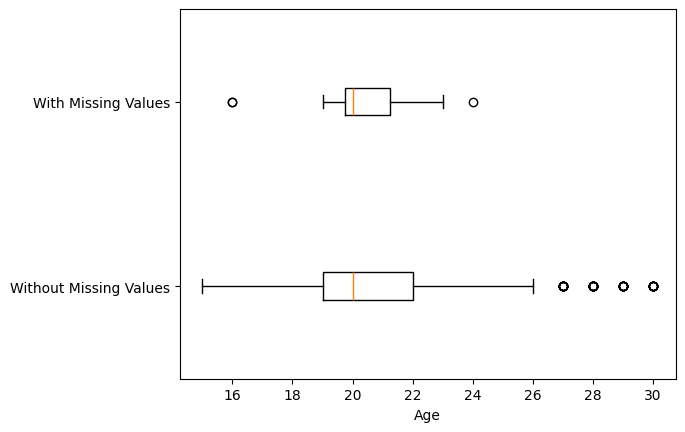

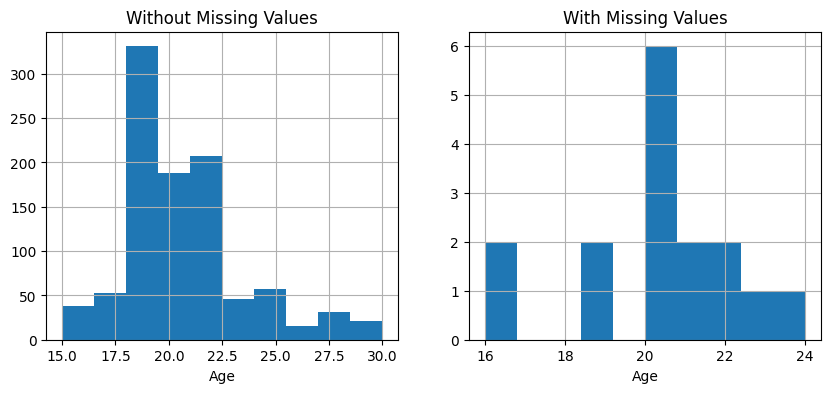

p-value of t-test: 0.7258243979822129


In [270]:
BM_MV = response_df['Weight'].isna()
Diagnose_MV_Numerical(response_df,'Age',BM_MV)

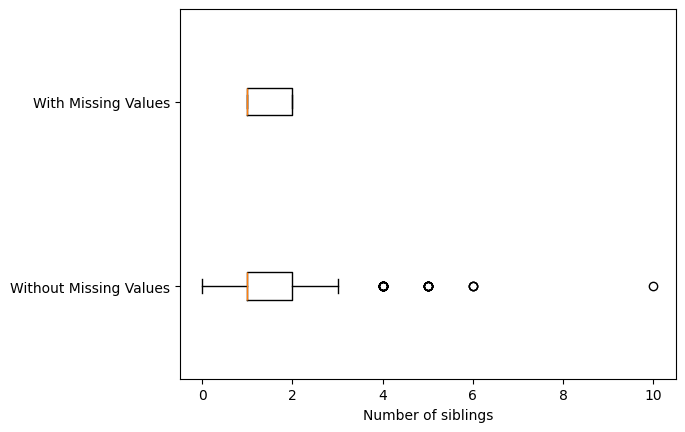

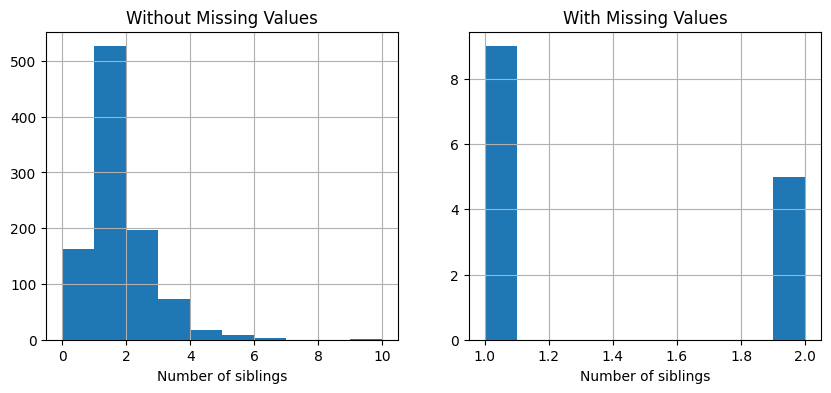

p-value of t-test: 0.8255092107556896


In [271]:
Diagnose_MV_Numerical(response_df,'Number of siblings',BM_MV)

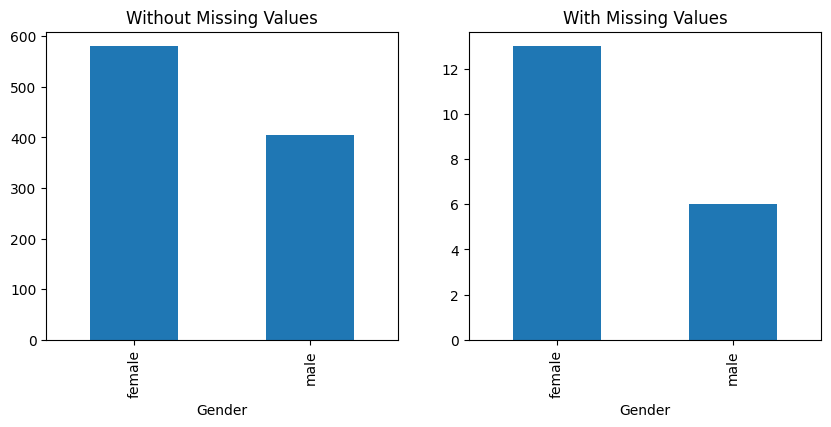

p-value of Chi_squared test: 0.5472167199163878


In [272]:
Diagnose_MV_Categorical(response_df,'Gender',BM_MV)

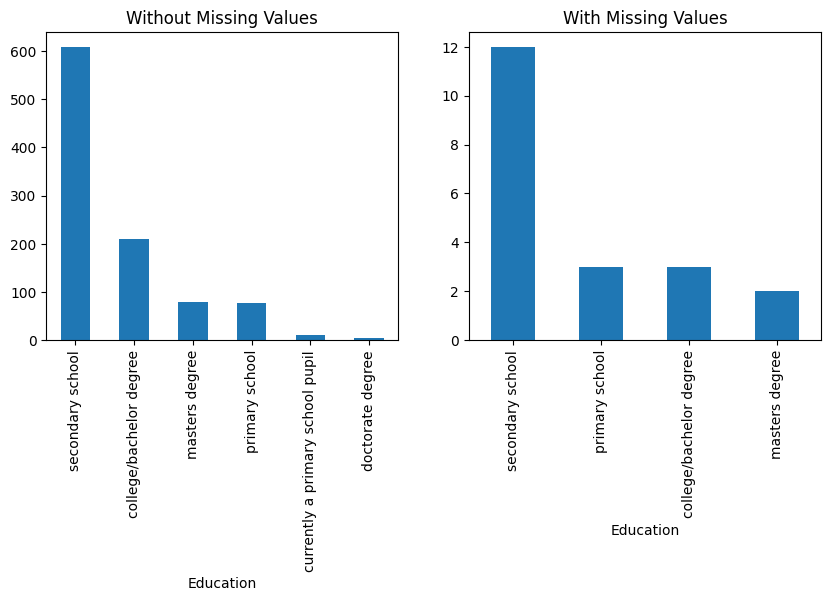

p-value of Chi_squared test: 0.8424822989541867


In [273]:
Diagnose_MV_Categorical(response_df,'Education',BM_MV)


6. Utiliza una medida de tendencia central para imputar los valores faltantes de `Weight`. ¿Cuál es recomendable y por qué?

Como pudimos analizar en el histograma, así como con la función `skew()`, sabemos que los datos de la variable `Weight` son asimétricas con un sesgo a la derecha. Por lo tanto, al no tener una distribución normal y poseer un sesgo, utilizaremos la mediana como medida de tendencia central para los valores faltantes.

In [274]:
response_df['Weight'] = response_df['Weight'].fillna(value=response_df['Weight'].median())
response_df['Weight'].isna().sum()

0

7. ¿Hay valores atípicos de la variable `Weight`? Confírmalo con un gráfico de boxplot. ¿Cuántos son? Almacénalos en un dataframe independiente y elimínalos del conjunto original.

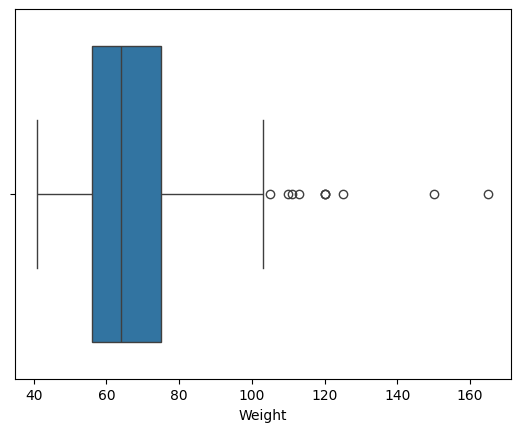

In [275]:
sns.boxplot(x=response_df['Weight'])
plt.show()

El analizar la variable `Weight` en un gráfico de boxplot podemos identificar visualemente que si existen diversos valores atípicos.

In [276]:
Q1 = response_df['Weight'].quantile(0.25)
Q3 = response_df['Weight'].quantile(0.75)
IQR = Q3 - Q1

BM = (response_df.Weight > (Q3+1.5 *IQR)) | (response_df.Weight < (Q1-1.5 *IQR))
Weight_Outliers = response_df[BM]['Weight']
Weight_Outliers

,Weight
292,120.0
612,110.0
715,111.0
793,120.0
796,113.0
859,125.0
885,165.0
973,120.0
992,150.0
998,105.0


In [277]:
print('Existen {} valores atípicos en la variable Weight'.format(len(Weight_Outliers)))

Existen 10 valores atípicos en la variable Weight


8. Repite el mismo proceso de valores atípicos con la variable `Height`.

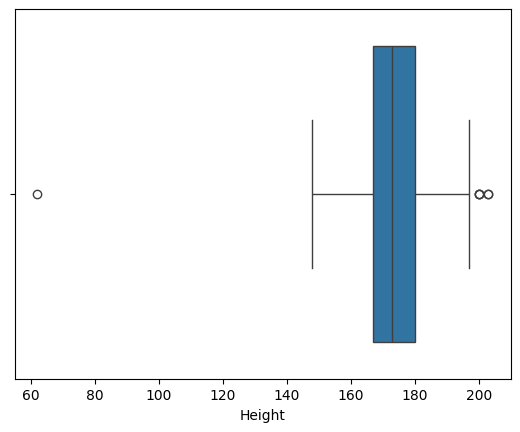

In [278]:
sns.boxplot(x=response_df['Height'])
plt.show()

Al analizar la variable `Height` con un gráfico de boxplot podemos detectar la existencia de pocos valores atípicos.

In [279]:
Q1 = response_df['Height'].quantile(0.25)
Q3 = response_df['Height'].quantile(0.75)
IQR = Q3 - Q1

BM = (response_df['Height'] > (Q3+1.5 *IQR)) | (response_df['Height'] < (Q1-1.5 *IQR))
response_df[BM]
len(response_df[BM])

6

9. ¿Hay encuestados que sean atípicos según su índice de masa corporal (`BMI`)? El `BMI` puede ser calculado usando la siguiente fórmula:

`BMI = Weight / Height ^ 2`

**NOTA**. El peso tiene que estar en kilogramos y la altura en metros, pero en el conjunto la altura se ha registrado en centímetros, por lo que deberás convertirla a metros.

10. Utiliza boxplots para visualizar la distribución del `BMI` según cada una de las variables categóricas de texto. Comenta un hallazgo que llame tu atención.